# Install and import libraries

In [1]:
#Installing all required libraries for project
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
# Import libraries for analysis, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")

In [3]:
# Install openpyxl 
!pip install openpyxl

# Import dataset

In [4]:
# Load dataset
df = pd.read_csv("../data/home_listings.csv")

# Test print
df.head()

,Address,Sale Price,Beds,Bath,Sq Ft,Lot Size,Year Built,Listing Price,Pool
0,"1319 Buchanan St, Hollywood, FL 33019",700000,3,2,1406,10174,1951,849000,0
1,"5680 NW 88th Ter, Coral Springs, FL 33067",770000,4,3,2706,2977,1987,799000,1
2,"2303 NW 115 Ave, Coral Springs, FL 33065",630000,4,3,2086,2295,1977,649899,1
3,"1201 E River Dr, Margate, FL 33063",372000,3,1,1065,7504,1959,399990,0
4,"1844 NW 81st Ave, Coral Springs, FL 33071",650000,4,2,1849,9766,1974,639900,1


In [5]:
# Extract ZIP from address column
df["Zip"] = df["Address"].str.extract(r'(\d{5})').astype(int)

# Test print
df.head()

,Address,Sale Price,Beds,Bath,Sq Ft,Lot Size,Year Built,Listing Price,Pool,Zip
0,"1319 Buchanan St, Hollywood, FL 33019",700000,3,2,1406,10174,1951,849000,0,33019
1,"5680 NW 88th Ter, Coral Springs, FL 33067",770000,4,3,2706,2977,1987,799000,1,33067
2,"2303 NW 115 Ave, Coral Springs, FL 33065",630000,4,3,2086,2295,1977,649899,1,33065
3,"1201 E River Dr, Margate, FL 33063",372000,3,1,1065,7504,1959,399990,0,33063
4,"1844 NW 81st Ave, Coral Springs, FL 33071",650000,4,2,1849,9766,1974,639900,1,33071


In [6]:
# Integer conversion
df["Lot Size"] = df["Lot Size"].astype(int)
df["Sq Ft"] = df["Sq Ft"].astype(int)
df["Beds"] = df["Beds"].astype(int)
df["Bath"] = df["Bath"].astype(int)
df["Year Built"] = df["Year Built"].astype(int)

# Numeric conversion
df["Sale Price"] = pd.to_numeric(df["Sale Price"])
df["Listing Price"] = pd.to_numeric(df["Listing Price"])

# Ensure dataset is clean

In [7]:
# Check column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Address        1000 non-null   object
 1   Sale Price     1000 non-null   int64 
 2   Beds           1000 non-null   int64 
 3   Bath           1000 non-null   int64 
 4   Sq Ft          1000 non-null   int64 
 5   Lot Size       1000 non-null   int64 
 6   Year Built     1000 non-null   int64 
 7   Listing Price  1000 non-null   int64 
 8   Pool           1000 non-null   int64 
 9   Zip            1000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 78.3+ KB


In [8]:
# Summary statistics for numeric columns
df.describe()

,Sale Price,Beds,Bath,Sq Ft,Lot Size,Year Built,Listing Price,Pool,Zip
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,1.196877e+06,3.478000,2.534000,2240.788000,6250.481000,1977.346000,1.250367e+06,0.509000,31185.254000
std,1.948189e+06,1.142288,1.278467,1312.455843,2811.368216,18.925868,2.033319e+06,0.500169,6143.262649
min,2.179000e+05,2.000000,1.000000,808.000000,1414.000000,1944.000000,2.576000e+05,0.000000,11051.000000
25%,4.549500e+05,3.000000,2.000000,1355.750000,3720.500000,1961.000000,4.527000e+05,0.000000,33063.000000
50%,6.322000e+05,3.000000,2.000000,1686.500000,6420.500000,1975.000000,6.701500e+05,1.000000,33068.000000
75%,8.277500e+05,4.000000,3.000000,2777.250000,8181.500000,1991.000000,8.644750e+05,1.000000,33311.000000
max,1.230000e+07,7.000000,8.000000,7211.000000,13594.000000,2025.000000,1.211190e+07,1.000000,33442.000000


# Model preparation

In [9]:
# Independent variables
features = ["Beds", "Bath", "Sq Ft", "Lot Size", "Year Built", "Listing Price", "Pool", "Zip"]

# Prediction target
target = "Sale Price"

X = df[features]
y = df[target]

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression Model

In [11]:
import numpy as np

# Linear Regression Model training
lr = LinearRegression()
lr.fit(X_train, y_train)

# Test set predictions
lr_pred = lr.predict(X_test)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)   # this manually computes RMSE
lr_r2 = r2_score(y_test, lr_pred)

# Print evaluation results
lr_mae, lr_rmse, lr_r2

(132768.58073168783, np.float64(284783.33348259353), 0.978147245987672)

# Random Forest Model

In [12]:
# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)

# Evaluation
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

# Print evaluation results
rf_mae, rf_rmse, rf_r2

(97116.73428333335, np.float64(183606.81139987335), 0.9909164708218611)

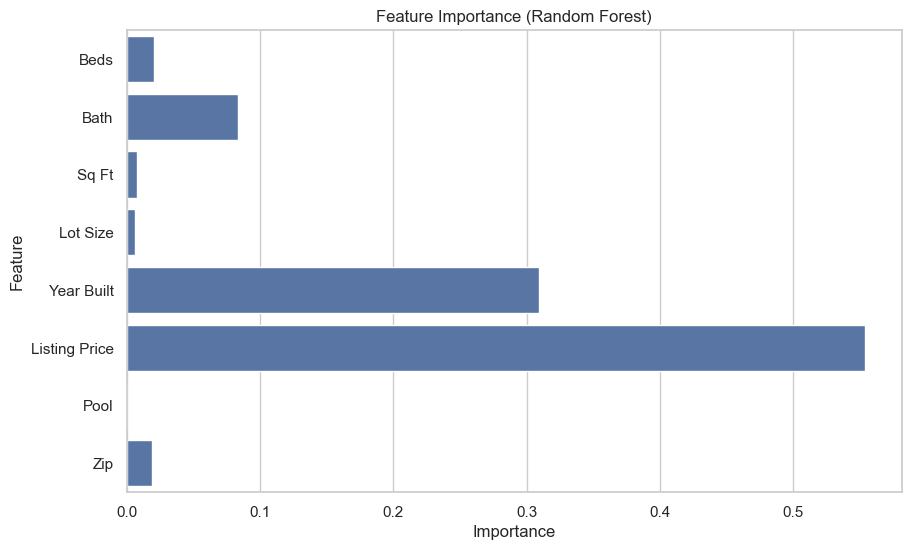

In [13]:
# Feature importance from Random Forest
importances = rf.feature_importances_
feature_names = features

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Visualizations

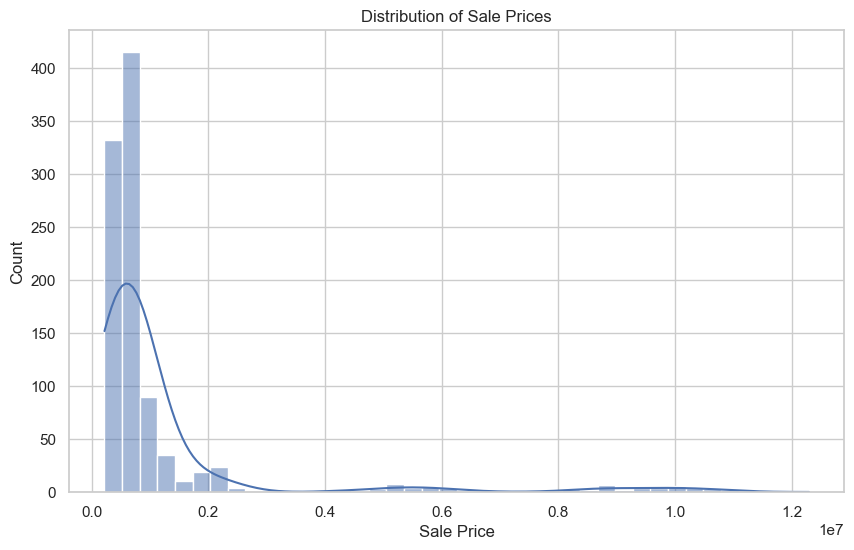

In [14]:
# Distribution of Sale Price - Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["Sale Price"], bins=40, kde=True)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()

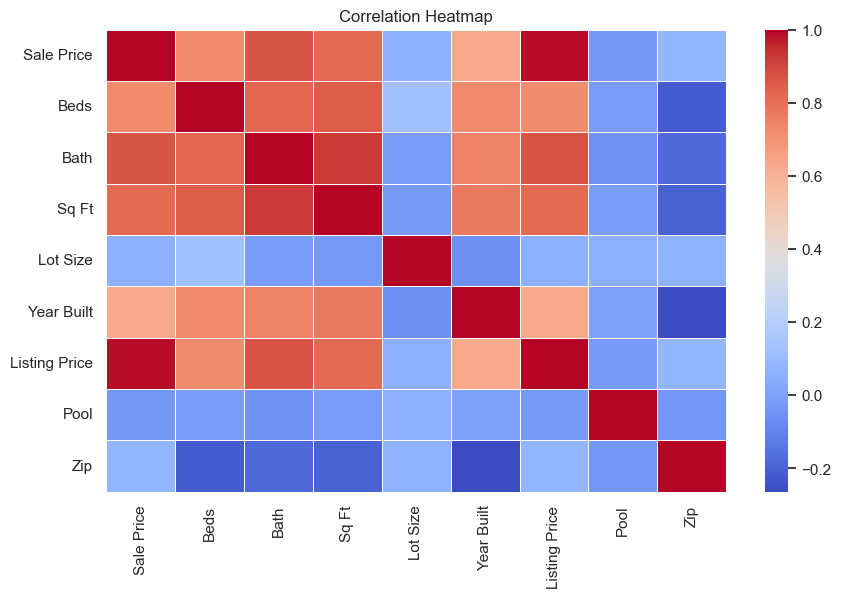

In [15]:
# Correlation heatmap (numeric columns only)
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

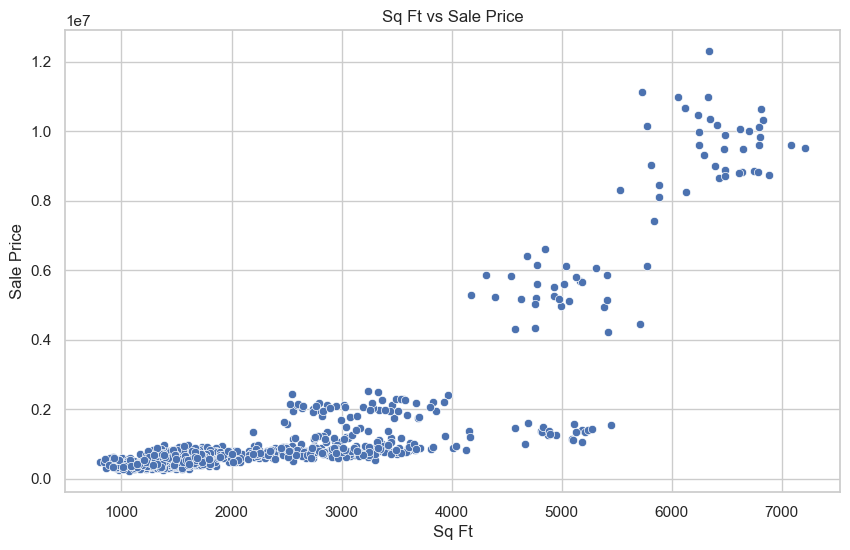

In [16]:
# Scatter plot of Sq Ft vs Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Sq Ft"], y=df["Sale Price"])
plt.title("Sq Ft vs Sale Price")
plt.xlabel("Sq Ft")
plt.ylabel("Sale Price")
plt.show()

# Decision Support Function

In [17]:
# Decision support function using trained Random Forest model
def predict_sale_price(beds, bath, sq_ft, lot_size, year_built, listing_price, pool, zip_code):
    input_data = pd.DataFrame([{
        "Beds": beds,
        "Bath": bath,
        "Sq Ft": sq_ft,
        "Lot Size": lot_size,
        "Year Built": year_built,
        "Listing Price": listing_price,
        "Pool": pool,
        "Zip": zip_code
    }])
    
    return rf.predict(input_data)[0]

# Demonstration of interactive query

In [18]:
# Example decision-support query
example_prediction = predict_sale_price(
    beds=4,
    bath=3,
    sq_ft=2500,
    lot_size=7000,
    year_built=1995,
    listing_price=650000,
    pool=1,
    zip_code=33067
)

example_prediction

np.float64(726367.0)

# Model Persistence

In [20]:
import joblib

joblib.dump(rf, "random_forest_price_model.pkl")

['random_forest_price_model.pkl']